# Simulation Code

To install:
1. Create a venv `python -m venv venv` in the current folder.
2. Activate venv `.\venv\Scripts\activate` (for Windows) or `./venv/bin/activate` (for Mac/Linux).
2. Install requirements from the file `pip install -r requirements.txt`.

In [1]:
# Imports
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
from pytictoc import TicToc
import math
from random import gauss
from random import seed
from pandas import Series
import sdeint
from numpy import linalg as LA
import itertools
import json
# from pactools import Comodulogram, REFERENCES
# from pactools import simulate_pac



In [5]:
def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc
    

In [ ]:
def g_fun(z,t,P):
    sigma_a=P[0]
    sigma_b=P[1]
    sigma_c=P[2]
    sigma_d=P[3]
    sigma_e=P[4]
    sigma_f=P[5]
    sigma_g=P[6]    
       
    tau_y=P[7]
    
    return np.diag([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sigma_a*tau_y,sigma_b*tau_y,sigma_c*tau_y,sigma_d*tau_y,sigma_e*tau_y,sigma_f*tau_y,sigma_g*tau_y])



In [1]:
from src.param import ParameterSet
p = ParameterSet('defaults.json')
print(dict(p))

TypeError: 'ParameterSet' object is not iterable

In [3]:
p.exc1

TypeError: 'numpy.float64' object is not iterable

In [7]:
from src.parameter import Parameter


In [5]:
p = Parameter()
print(p)
# to change a single parameter use:
p.setParam('J', 'ee_s', 0.5)
# to scale all parameters in a paramFamily use:
p.scaleParams('J_AMPA', 100)
print(p)


<Parameter
  sigma={'exc1': 6, 'exc2': 6, 'pv': 2.5, 'st1': 2.5, 'st2': 2.5, 'v1': 2.5, 'v2': 2.5}
  tau={'exc1': 0.0288, 'exc2': 0.0288, 'pv': 0.0024, 'st1': 0.0072, 'st2': 0.0072, 'v1': 0.0072, 'v2': 0.0072, 'ampa': 0.00096, 'r': 0.002, 'n': 0.00096}
  gamma={'exc1': 2.675, 'exc2': 2.675, 'pv': 4.1625, 'st1': 2.075, 'st2': 2.075, 'v1': 2.075, 'v2': 2.075, 'ampa': 2.075}
  J={'ee_s': 0.4813, 'ee_c': 0.0107, 'epv': -0.36, 'es': -0.45, 'pvpv': -0.12, 'se': 0.35, 've': 0.45, 'vs': -0.35, 'sv': -0.35, 'pve': 0}
  J_AMPA={'ee_s': 3.8, 'ee_c': 1.75, 'pve': 3.2}
  I_back={'exc1': 0.48, 'exc2': 0.48, 'pv': 0.4, 'st1': 0.15, 'st2': 0.15, 'v1': 0, 'v2': 0}
  I_ext={}
  I_noise={}
  other_params={'a': 135, 'b': 54, 'd': 0.308, 'g_I': 4, 'c_1': 615, 'c_0': 177, 'r_0': 5.5}
>
<Parameter
  sigma={'exc1': 6, 'exc2': 6, 'pv': 2.5, 'st1': 2.5, 'st2': 2.5, 'v1': 2.5, 'v2': 2.5}
  tau={'exc1': 0.0288, 'exc2': 0.0288, 'pv': 0.0024, 'st1': 0.0072, 'st2': 0.0072, 'v1': 0.0072, 'v2': 0.0072, 'ampa': 0.00096

In [1]:
p = Parameter('myparams1.json', buildOnDefaults=False)
print(p)

NameError: name 'Parameter' is not defined

In [4]:
def model_MW(z,t,Q: Parameter):
    
    ratio=0

    tau_a = Q.exc1['tau']
    tau_b = Q.exc2['tau']
    tau_c = Q.pv['tau']
    tau_sa = Q.sst1['tau']
    tau_sb = Q.sst2['tau']
    tau_va = Q.vip1['tau']
    tau_vb = Q.vip2['tau']
    
    tau_Aa = Q.exc1['tau_ampa']
    tau_Ab = Q.exc2['tau_ampa']
    
    tau_r = Q.constants['tau_r']
    tau_n = Q.constants['tau_n']
    
        
    gamma_a = Q[11]
    gamma_b = Q[12]
    gamma_Aa = Q[13]
    gamma_Ab = Q[14]
    gamma_c = Q[15]
    gamma_sa = Q[16]
    gamma_sb = Q[17]
    gamma_va = Q[18]
    gamma_vb = Q[19]

    gamma_ra = Q[20]
    gamma_rb = Q[21]
    gamma_rc = Q[22]
    gamma_rs = Q[23]
    gamma_v = Q[24]
    
        
    g_I = Q[25]
    c_1 = Q[26]
    c_0 = Q[27]
    r_0 = Q[28]
    
    a = Q[29]
    b = Q[30]
    d = Q[31]
    
    J_c = Q[32]
    J_ei = Q[33]
    J_ii = Q[34]
            
    J_0 = Q[35]
   
    J_s = Q[36]

    
    J_se = Q[37]   
    J_ce = Q[38]
    J_sp = Q[39]
    
    J_es = Q[40]

    
    J_pv = Q[41]
    J_sv = Q[42]
    
    J_vs = Q[43]
            

    
    J_Aa = Q[44]
    J_Ab = Q[45]
    
    J_Ia = Q[46]
    J_Ib = Q[47]   
        
           
    p1 = Q[48]
    p2 = Q[49] 
    
    # Iback_a = Q[50]
    # Iback_b = Q[51]
    # Iback_c = Q[52]  
    # Iback_d = Q[53]
    # Iback_e = Q[54]
    # Iback_f = Q[55]
    # Iback_g = Q[56]  
    
    # fq=8*math.pi #4HZ
    # ca_F=0.1
    # ca_G=0.1
          
    # Iback_a += ca_F*np.sin(fq*t)
    # Iback_b += ca_G*np.sin(fq*t)

    def getIback(v):
        if type(v)==float or type(v)==int:
            return v
        v_type = v['type']
        if v_type == 'sin':
            return v['amplitude']*np.sin(v['frequency']*2*math.pi*t + v['phase']) + v['y_offset']
        
    Iback_a = getIback(Q.exc1['I_back'])
    Iback_b = getIback(Q.exc2['I_back'])
    Iback_c = getIback(Q.pv['I_back'])
    Iback_d = getIback(Q.sst1['I_back'])
    Iback_e = getIback(Q.sst2['I_back'])
    Iback_f = getIback(Q.vip1['I_back'])
    Iback_g = getIback(Q.vip2['I_back'])
            
    
    #Iback_f += ca_F*np.sin(fq*t)
    #Iback_g += ca_G*np.sin(fq*t)
    
    I_a = Q[57]
    I_b = Q[58]
    I_c = Q[59]
    
    I_va = Q[60]
    I_vb = Q[61]
    
    eta=tau_c*gamma_c*c_1/(g_I-J_ii*tau_c*gamma_c*c_1)
    J_ie = (J_0-J_s-J_c)/(2*J_ei*eta)
    
    idx=(t> 4 and t< 6)
    idy=(t>12 and t<14)
    
    #uncomment for input
    #I_va = I_va*idy
    #I_vb = I_va*idy
    
    I_a = I_a*idx
    I_b = I_b*idx
    I_c = I_c*idx
    
    
    
    #-------------------------------------------------------------
        
    dz=np.zeros(23)
    
    sa    = z[0]
    sb    = z[1]
    sc    = z[2]
    s_Aa  = z[3]
    s_Ab  = z[4]
    st_a  = z[5]
    st_b  = z[6]
    s_va  = z[7]
    s_vb  = z[8]
    r_a   = z[9]
    r_b   = z[10]
    r_c   = z[11]
    r_d   = z[12]
    r_e   = z[13]
    r_f   = z[14]
    r_g   = z[15]
    y_a   = z[16]
    y_b   = z[17]
    y_c   = z[18]
    y_d   = z[19]
    y_e   = z[20]
    y_f   = z[21]
    y_g   = z[22]
    
       
    # define s_Ac, s_sa, s_sb = 0 so the whole thing is uniform?
    input_a  = J_s *sa + J_c *sb + J_ei*sc   + J_Aa*s_Aa + J_Ab*s_Ab + I_a + J_es*st_a + Iback_a + y_a
    input_b  = J_c *sa + J_s *sb + J_ei*sc   + J_Aa*s_Ab + J_Ab*s_Aa + I_b + J_es*st_b + Iback_b + y_b
    input_c  = J_ie*sa + J_ie*sb + J_ii*sc   + J_Ia*s_Aa + J_Ib*s_Ab + I_c             + Iback_c + y_c
    input_sa = J_se*sa + J_ce*sb + J_sp*s_Aa + J_vs*s_va                               + Iback_d + y_d
    input_sb = J_ce*sa + J_se*sb + J_sp*s_Ab + J_vs*s_vb                               + Iback_e + y_e
    # moved from below
    input_va = J_pv*sa + J_sv*st_a                                                     + Iback_f + y_f + I_va
    input_vb =           J_pv*sb + J_sv*st_b                                           + Iback_g + y_g + I_vb
    
    inp_opto_sa = ratio*input_sa
    inp_opto_sb = ratio*input_sb
    input_sa -= inp_opto_sa
    input_sb -= inp_opto_sb
    # # what is happening above? Why not just:
    # input_sa -= ratio*input_sa
    # input_sb -= ratio*input_sb
    # # or even better:
    # input_sa *= (1-ratio)
    # # or even in the line you define it:
    # input_sa = (1-ratio) * (.....)
    
    input_va = J_pv*sa+J_sv*st_a+Iback_f+I_va+y_f
    input_vb = J_pv*sb+J_sv*st_b+Iback_g+I_vb+y_g
    
    g1=1
    
    phi_a = g1*p1*(a*input_a-b)/(1-np.exp(-d*(a*input_a-b)))    
    phi_b = g1*p2*(a*input_b-b)/(1-np.exp(-d*(a*input_b-b)))

    def getPhi(input_v):
        phi = (c_1*input_v -c_0) / g_I + r_0
        return 0 if phi < 0 else phi
        # if numpy is available, you can do:
        phi[phi<0] = 0
        return phi 
    
    phi_c  = getPhi(input_c )
    phi_sa = getPhi(input_sa)
    phi_sb = getPhi(input_sb)
    phi_va = getPhi(input_va)
    phi_vb = getPhi(input_vb) 
    # again, with numpy you can do:
    [phi_c, phi_sa, phi_sb, phi_va, phi_vb]  = getPhi([input_c, input_sa, input_sb, input_va, input_vb]) 
    

    dsa   = -(sa   / tau_a ) + gamma_a  * r_a * (1-sa)
    dsb   = -(sb   / tau_b ) + gamma_b  * r_b * (1-sb)
    ds_Aa = -(s_Aa / tau_Aa) + gamma_Aa * r_a
    ds_Ab = -(s_Ab / tau_Ab) + gamma_Ab * r_b
    dst_a = -(st_a / tau_sa) + gamma_sa * r_d
    dst_b = -(st_b / tau_sb) + gamma_sb * r_e
    ds_va = -(s_va / tau_va) + gamma_va * r_f
    ds_vb = -(s_vb / tau_vb) + gamma_vb * r_g
    
    dsc = (-(sc/tau_c)+gamma_c*r_c)

    dr_a = ((phi_a  - r_a) / tau_r) * gamma_ra
    dr_b = ((phi_b  - r_b) / tau_r) * gamma_rb
    dr_c = ((phi_c  - r_c) / tau_r) * gamma_rc
    dr_d = ((phi_sa - r_d) / tau_r) * gamma_rs
    dr_e = ((phi_sb - r_e) / tau_r) * gamma_rs
    dr_f = ((phi_va - r_f) / tau_r) * gamma_v
    dr_g = ((phi_vb - r_g) / tau_r) * gamma_v
    # phi = np.array([phi_a, phi_b, phi_c, phi_sa, phi_sb, phi_va, phi_vb])
    # r = np.array([r_a, r_b, r_c, r_d, r_e, r_f, r_g])
    # gamma = np.array([gamma_ra, gamma_rb, gamma_rc, gamma_rs, gamma_rs, gamma_v, gamma_v])
    # dr   = (phi - r) * gamma / tau_r

    dy_a = - (y_a / tau_n)
    dy_b = - (y_b / tau_n)
    dy_c = - (y_c / tau_n)
    dy_d = - (y_d / tau_n)
    dy_e = - (y_e / tau_n)
    dy_f = - (y_f / tau_n)
    dy_g = - (y_g / tau_n)
    y = np.array([y_a, y_b, y_c, y_d, y_e, y_f, y_g])
    dy = y / tau_n
    
    
        
    dz[0]  = dsa
    dz[1]  = dsb
    dz[2]  = dsc
    dz[3]  = ds_Aa
    dz[4]  = ds_Ab
    dz[5]  = dst_a
    dz[6]  = dst_b
    dz[7]  = ds_va
    dz[8]  = ds_vb
    
    dz[9]  = dr_a
    dz[10]  = dr_b
    dz[11]  = dr_c
    dz[12] = dr_d
    dz[13] = dr_e
    dz[14] = dr_f
    dz[15] = dr_g
    
    dz[16] = dy_a
    dz[17] = dy_b
    dz[18] = dy_c
    dz[19] = dy_d
    dz[20] = dy_e
    dz[21] = dy_f
    dz[22] = dy_g
        
    # dz = np.concatenate(([dsa,dsb],ds,dr,dy))
    
    return dz 


In [17]:
def tmp():
    inp = 0
    t_in = TicToc() #create instance of class

    t_in.tic() #Start timer

    ## Parameter for noise
    sigma_a = 6 #2.5
    sigma_b = 6 
    sigma_c = 2.5
    sigma_d = 2.5
    sigma_e = 2.5
    sigma_f = 2.5
    sigma_g = 2.5
    tau_y = 0.01

    P=[[sigma_a,sigma_b,sigma_c,sigma_d,sigma_e,sigma_f,sigma_g,tau_y]]


    ## Setting the background current

    #pp1 = 0.48
    #pp2 = 0.40

    #pp1 = 0.48
    #pp2 = 0.70

    #pp1 = 0.48
    #pp2 = 0.50

    #pp1 = 0.40
    #pp2 = 0.50

    #pp1 = 0.60
    #pp2 = 0.50

    pp1=inputs[inp][0]
    pp2=inputs[inp][1]
    print(pp1,pp2)

    ## Parameters for the system
    tau_a = 0.0288
    tau_b = 0.0288
    tau_c = 0.0024
    tau_Aa = 0.00096
    tau_Ab = 0.00096
    tau_r = 0.002
    tau_n = 0.00096
    tau_sa = 0.0072
    tau_sb = 0.0072
    tau_va = 0.0072
    tau_vb = 0.0072


    gamma_a = 2.675
    gamma_b = 2.675
    gamma_Aa = 2.075
    gamma_Ab = 2.075
    gamma_c = 4.1625
    gamma_sa = 2.075
    gamma_sb = 2.075
    gamma_va = 2.075
    gamma_vb = 2.075

    gamma_ra = 1.0
    gamma_rb = 1.0
    gamma_rc = 1.0
    gamma_rs = 1.0
    gamma_v = 1.0


    g_I = 4
    c_1 = 615
    c_0 = 177
    r_0 = 5.5

    a = 135
    b = 54
    d = 0.308

    J_c = 0.0107
    J_ei = -0.36
    J_ii = -0.12

    J_0 = 0.2112

    J_s = 0.4813


    J_se = 0.35   
    J_ce = 0.0
    J_sp = 0.25

    J_es = -0.45


    J_pv = 0.45
    J_sv = -0.35

    J_vs = -0.35

    J_Aa = 3.8 *0.8
    J_Ab = 1.75 *0.8

    J_Ia = 3.2 *0.8
    J_Ib = 3.2 *0.8  


    p1 = 1.0
    p2 = 1.0 

    Iback_a = pp1
    Iback_b = pp1
    Iback_c = pp2

    Iback_d = 0.15
    Iback_e = 0.15


    Iback_f = 0.0
    Iback_g = 0.0  

    I_a = 0.0
    I_b = 0.0
    I_c = 0.0

    I_va = 0.2
    I_vb = 0.2

    Q=[tau_a,tau_b,tau_c,tau_Aa,tau_Ab,tau_r,tau_n,tau_sa,tau_sb,tau_va,tau_vb,gamma_a,gamma_b,gamma_Aa,gamma_Ab,gamma_c,gamma_sa,gamma_sb,gamma_va,gamma_vb,gamma_ra,gamma_rb,gamma_rc,gamma_rs,gamma_v,g_I,c_1,c_0,r_0,a,b,d,J_c,J_ei,J_ii,J_0,J_s,J_se,J_ce,J_sp,J_es,J_pv,J_sv,J_vs,J_Aa,J_Ab,J_Ia,J_Ib,p1,p2,Iback_a,Iback_b,Iback_c,Iback_d,Iback_e,Iback_f,Iback_g,I_a,I_b,I_c,I_va,I_vb]


    ##Input Parameters

    Qp0=[np.array(Q)]
    Qp1=[np.array(Q)]

    #Qp[0][50]=Iback_a
    #Qp[0][51]=Iback_b
    #Qp[0][52]=Iback_c

    #Qp[0][57]=I_a
    #Qp[0][58]=I_b
    #Qp[0][59]=I_c

    #Qp[0][60]=I_va
    #Qp[0][61]=I_vb
    ##

    Qp1[0][50]=pp1
    Qp1[0][51]=pp1
    Qp1[0][52]=pp2

    # this is where you can adjust the external input to the excitatory population
    Qp1[0][57]=0.3
    Qp1[0][58]=0.0
    Qp1[0][59]=0.0

    #Qp1[0][60]=0.2
    #Qp1[0][61]=0.2

    #print([Qp1[0][57],Qp0[0][57]])

    ##Solve the system
    z1=[0.05,0.05,0.03,0.05,0.05,0.05,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

    #Np=10
    #nn1=100001

    Np=50
    nn1=500001

    Te=Np


    t = np.linspace(0,Np,nn1)
    T = np.linspace(0,Np*1000,nn1)

    clr=['b','r']

    nn1-1
  #  fig1, axs = plt.subplots(3,2) 
  #  fig2, ax = plt.subplots(3,2)
  #  fig3, ax1 = plt.subplots(3,2)


    for i in range(1):

        if i==0:
            d2=sdeint.itoint(close(model_MW, *Qp1), close(g_fun,*P), z1, t)
#d4 is optpo - short time
# d1 is opto - long time
#d2 is no opto - long time

0.45 0.35


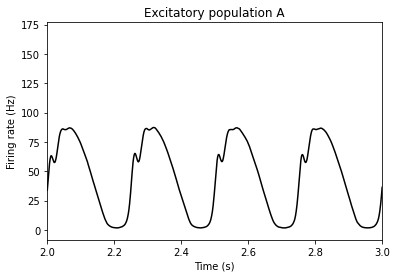

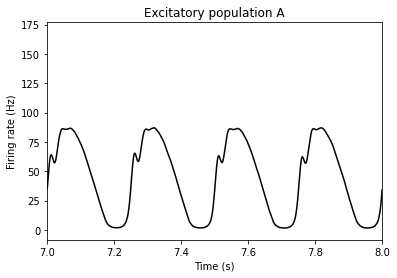

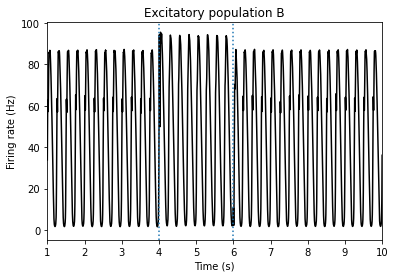

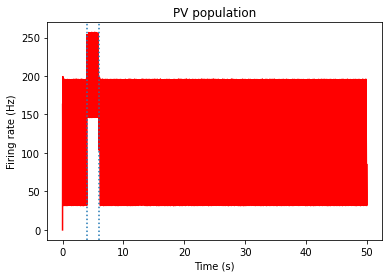

In [19]:
ns=0
plt.plot(t[ns:nn1],d2[ns:nn1,9],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population A")
plt.xlim([2,3])
plt.axvline(x=4, ls=':')
#plt.ylim([0,100])
plt.axvline(x=6,  ls=':')
plt.show()

plt.plot(t[ns:nn1],d2[ns:nn1,9],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population A")
plt.xlim([7,8])
plt.axvline(x=4, ls=':')
#plt.ylim([0,100])
plt.axvline(x=6,  ls=':')
plt.show()

plt.plot(t[ns:nn1],d2[ns:nn1,10],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population B")
plt.axvline(x=4, ls=':')
plt.axvline(x=6,  ls=':')
plt.xlim([1,10])
plt.show()
plt.plot(t[ns:nn1],d2[ns:nn1,11],color="red")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.axvline(x=4, ls=':')
plt.axvline(x=6,  ls=':')
#plt.ylim([0,150])
plt.title("PV population")
plt.show()

In [4]:
signal2 = d4[ns:nn1,9]

In [5]:
#signal2 = signal2[61000:]

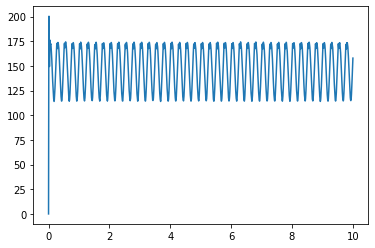

In [6]:
plt.plot(t[ns:nn1],signal2)

ozkurt... 
canolty... 
tort... 
penny... 
vanwijk... 
duprelatour... 


C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON
C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON
C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON


colgin... 
sigl... 
bispectrum... 


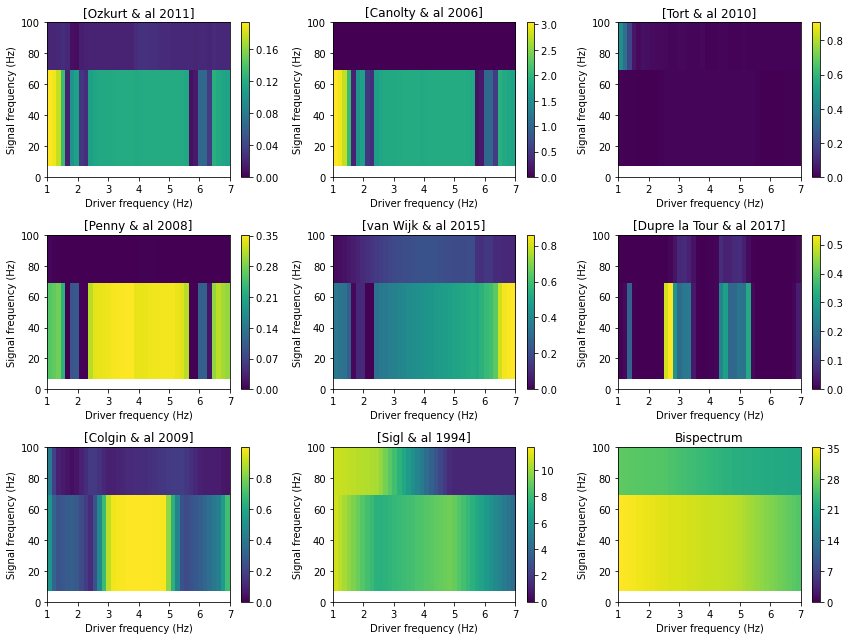

In [38]:
# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
fig, axs = plt.subplots(
    n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
axs = axs.ravel()

#params
fs=10000
low_fq_range = np.linspace(1, 7, 40)
low_fq_width = 1.0  # Hz

# Compute the comodulograms and plot them
for ax, method in zip(axs, methods):
    print('%s... ' % (method, ))
    estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=method,
                             progress_bar=False)
    estimator.fit(signal2)
    estimator.plot(titles=[REFERENCES[method]], axs=[ax])
    ax.set_ylim([0, 100])

plt.show()

In [39]:
a=1

In [ ]:
#dont run from here

In [ ]:
fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 5.0  # Hz
low_fq_width = 1.0  # Hz

n_points = 10000
noise_level = 0.4

signal = simulate_pac(n_points=n_points, fs=fs, high_fq=high_fq, low_fq=low_fq,
                      low_fq_width=low_fq_width, noise_level=noise_level,
                      random_state=0)

low_fq_range = np.linspace(1, 10, 50)
methods = [
    'ozkurt', 'canolty', 'tort', 'penny', 'vanwijk', 'duprelatour', 'colgin',
    'sigl', 'bispectrum'
]
low_fq_width = 1.0  # Hz
# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
fig, axs = plt.subplots(
    n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
axs = axs.ravel()


# Compute the comodulograms and plot them
for ax, method in zip(axs, methods):
    print('%s... ' % (method, ))
    estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=method,
                             progress_bar=False)
    estimator.fit(signal)
    estimator.plot(titles=[REFERENCES[method]], axs=[ax])
    #ax.set_ylim([0, 80])

plt.show()

In [ ]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_wavelet

sf=(nn1-1)/Np

data2=d2[70000:,0].reshape((1,len(d2[70000:,0])))
sf=(nn1-1)/Np  #sampling frequence
p = Pac(f_pha='hres', f_amp='hres', dcomplex='wavelet')
# etract all of the phases and amplitudes
phases = p.filter(sf, data2, ftype='phase', n_jobs=1)
amplitudes = p.filter(sf, data2, ftype='amplitude', n_jobs=1)
plt.figure(figsize=(14, 8))
for i, k in enumerate([ 2]):
    # switch method of PAC
    p.idpac = (k, 0, 0)
    # compute only the pac without filtering
    xpac = p.fit(phases, amplitudes)
    # plot
    plt.subplot(2, 3, k)
    title = p.method.replace(' (', f' ({k})\n(')
    p.comodulogram(xpac.mean(-1), title=title, cmap='viridis')
    if k <= 3:
        plt.xlabel('')

plt.tight_layout()
plt.show()

In [65]:
import json
class Param:
  def __init__(self):
      return 
  
  def __setattr__(self, __name: str, __value) -> None:
    print('setattr',__name, __value)
    if type(__value) ==dict:
      p = Param()
      self.__dict__[__name]=p
      for k in __value:
        setattr(p,k,__value[k])      
    if type(__value) in [float, int]:
      self.__dict__[__name]=np.float64(__value)
  
  def __repr__(self):
    d = self.__dict__
    return str(d)

In [66]:
p=Param()
d={"a":1,"b":2,"c":{"d":3,"e":4}}
p.x=d
p


setattr x {'a': 1, 'b': 2, 'c': {'d': 3, 'e': 4}}
setattr a 1
setattr b 2
setattr c {'d': 3, 'e': 4}
setattr d 3
setattr e 4


{'x': {'a': 1.0, 'b': 2.0, 'c': {'d': 3.0, 'e': 4.0}}}

In [64]:
p.x.c

{'d': 3.0, 'e': 4.0}